# The classification problem

As humans we can easily recognize a face, tell one letter from another and decide whether our milk is spoiler or not. How can we a machine learn to accomplish similar tasks?

Let's illustrate the answer to this question with an example. At the end of the 10s a group of researchers collected a set of wheat kernels belonging to three different varieties (Kama, Rosa and Canadian) {cite}`seeds_dataset`. They scanned each of them with an X-ray machine and after they measured a set of **features** for each kernel:

- area A,
- perimeter P,
- compactness (C = $4 \pi A/P^2$),
- length of kernel
- width of kernel
- asymmetry coefficient
- length of kernel groove.

In this scenario we can formulate a classification problem in quite straightforward fashion. Given a wheat kernel, can we tell its variety looking at the features listed above? This certainly seems like a doable task for a machine. After all, the features we are talking about are numerical values that machines can understand quite well.

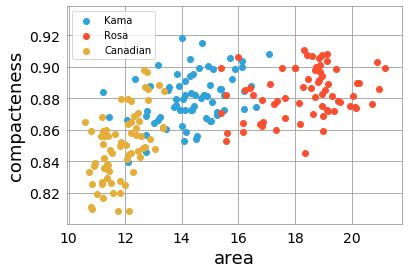

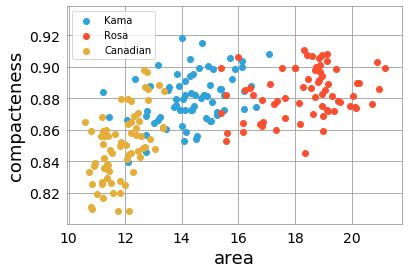

In [1]:
from mlpages_lib import *
%matplotlib inline

data = pd.read_csv('data/seeds_dataset.txt', 
                    names=['area', 'perimeter', 'compactness', 'length_kernel', 'width_kernel',
                   'asymmetry_coefficient', 'length_kernel_groove', 'target'], 
                   sep='\t+', engine='python')

seeds_label = ['Kama', 'Rosa', 'Canadian']
fig = plt.figure()
for i, c in enumerate(data['target'].unique()):
    plt.scatter(data['area'][data.target==c],
                data['compactness'][data.target==c], 
                label=seeds_label[i])
    plt.xlabel('area')
    plt.ylabel('compacteness')
plt.legend()
glue("seeds_fig_1", fig, display=False)

```{glue:figure} seeds_fig_1
:name: "fig-seeds-1"

Area of the kernels versus compactness.
```

If we pick two of the features listed above and plot them with a scatter chart, we have a space where each kernel is represent by a dot and we can color the dots according to variety of the kernel. Looking at {ref}`this figure <fig-seeds-1>` we can easily tell that each variety has a different area. Here the idea! If we say that all the kernels with area greater than 16mm belong to the **class** Rosa we have a **model** that classifies the kernels.

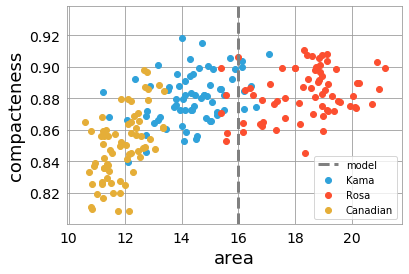

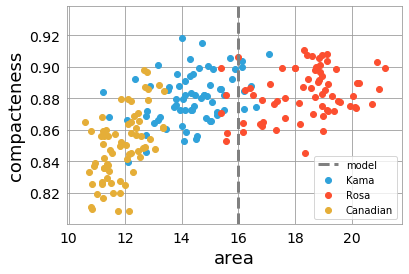

In [2]:
fig = plt.figure()
for i, c in enumerate(data['target'].unique()):
    plt.scatter(data['area'][data.target==c],
                data['compactness'][data.target==c], 
                label=seeds_label[i])
    plt.xlabel('area')
    plt.ylabel('compacteness')
plt.axvline(16, color='gray', linestyle='--', label='model')
plt.legend()
glue("seeds_fig_2", fig, display=False)

```{glue:figure} seeds_fig_2
:name: "fig-seeds-2"

Model that can be used by a machine to tell the kernels belonging to Rosa variety. 
```

We're now in the position where given a box full of what kernels, we can build a machine that measures their area and applies the simple rule above to tell which kernels belong to the variety Rosa. This machine can save valuable hours of work for a human! But our position gets even more comfortable if we are able to tell apart all the varieties of kernels.

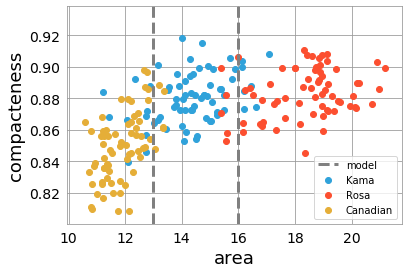

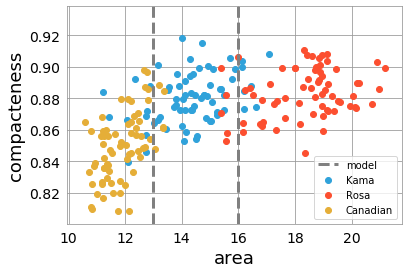

In [3]:
fig = plt.figure()
for i, c in enumerate(data['target'].unique()):
    plt.scatter(data['area'][data.target==c],
                data['compactness'][data.target==c], 
                label=seeds_label[i])
    plt.xlabel('area')
    plt.ylabel('compacteness')
plt.axvline(16, color='gray', linestyle='--', label='model')
plt.axvline(13, color='gray', linestyle='--')
plt.legend()
glue("seeds_fig_3", fig, display=False)

```{glue:figure} seeds_fig_3
:name: "fig-seeds-3"

Models that can be used by a machine to separate all the three varieties of kernels. 
```

In the {ref}`the figure above <fig-seeds-3>` we managed place all our kernels into bins that reflect their variety. This means that we have the specifications for a program that enables a machine to solve our classification problem. 